# What is Anomaly Detection?

**Anomaly detection** is the task of identifying rare items, events, or observations that **differ significantly from the majority of the data** — in other words, they’re the “outliers” or “unexpected patterns.”


It helps in spotting:

- **Fraudulent transactions** in finance
- **Faults or failures** in manufacturing or IoT
- **Network intrusions** in cybersecurity
- **Unusual medical conditions** in healthcare
- **Unexpected user behavior** in software systems


### **How does it work conceptually?**

At its core, anomaly detection relies on **learning what is normal**, and then detecting **what deviates from that norm**.

There are three main types of approaches:

1. **Supervised**:  
   You have labeled data: *"this is normal"*, *"this is anomalous"* — and you train a classifier.  
   👉 Rare in practice, because anomalies are rare and labeling is expensive.

2. **Unsupervised**:  
   You only have normal data and look for points that are statistically or structurally unusual.  
   👉 Most common in real-world scenarios.

3. **Semi-supervised**:  
   You train a model on known normal data and flag anything outside that distribution as anomalous.


### **Popular methods**:

- **Statistical models**: Z-score, Gaussian models
- **Distance-based**: k-NN, DBSCAN
- **Isolation-based**: Isolation Forest
- **Machine learning**:
  - One-Class SVM
  - Autoencoders (deep learning)
- **Time-series based**:
  - ARIMA
  - LSTM-based models for sequential anomalies

Here, we will talk about statistical models that use the Gaussian distibution to detect anomalies in the data.

# Gaussian Model Anomaly Detection

Statistical models like **Gaussian models** (a.k.a. **normal distribution-based models**) are a common and intuitive approach for **anomaly detection**, especially when you assume that the **normal data is distributed normally (bell-shaped curve)**.


### **1. Assumption: Normal data is Gaussian**

We assume that the data (or at least each feature) follows a **Gaussian (normal) distribution**:

$$
x \sim \mathcal{N}(\mu, \sigma^2)
$$

Where:
- $ \mu $ is the mean of the data
- $ \sigma^2 $ is the variance

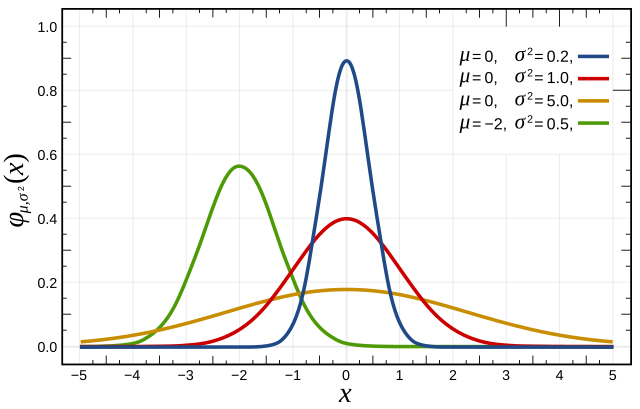


### **2. Anomaly score = Probability under the distribution**

You compute the **probability** of observing a value under the Gaussian distribution:

$$
P(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

- If $ P(x) $ is **very low**, $ x $ is unlikely under the normal distribution → likely an **anomaly**.
- You define a threshold $ \varepsilon $, and if $ P(x) < \varepsilon $, classify it as an anomaly.


### **3. Multivariate Gaussian (optional)**

If your data has **multiple features**, you can model them together using the **multivariate normal distribution**:

$$
P(\vec{x}) = \frac{1}{(2\pi)^{k/2} |\Sigma|^{1/2}} \cdot \exp\left( -\frac{1}{2} (\vec{x} - \mu)^T \Sigma^{-1} (\vec{x} - \mu) \right)
$$

Where:
- $ \vec{x} $ is a feature vector
- $ \mu $ is the mean vector
- $ \Sigma $ is the covariance matrix
- This captures **correlations** between features

  
### **4. Steps for using a Gaussian model for anomaly detection**

1. **Train**:
   - Estimate $ \mu $ and $ \sigma^2 $ (or $ \Sigma $) from the training (normal) data for each .

2. **Evaluate**:
   - For a new point, compute $ P(x) $ or $ P(\vec{x}) $.

3. **Decision**:
   - If the probability is below a threshold $ \varepsilon $, flag it as an anomaly.


### Pros:
- Simple, fast, and interpretable
- Works well when the normal data distribution is Gaussian

### Cons:
- Doesn't work well if the data is **not normally distributed**
- Assumes **independence of features** (unless using the multivariate version)

# Naive Gaussian Model

The **Naive Gaussian model for anomaly detection** assumes that:

1. Each feature is **independent** of the others (hence "naive").
2. Each feature is **normally distributed**.
3. You compute the **joint probability** of a data point by multiplying the probabilities of each feature.


### **Goal**: Estimate the probability of a feature vector $ \vec{x} = [x_1, x_2, ..., x_n] $ under the assumption that each $ x_i \sim \mathcal{N}(\mu_i, \sigma_i^2) $, and then flag as anomaly if this joint probability is very low.


### **Step-by-step procedure**

#### **1. Estimate parameters from training data**
For each feature $ i $, compute:

- The **mean**:
  $$
  \mu_i = \frac{1}{m} \sum_{j=1}^{m} x_i^{(j)}
  $$
- The **variance**:
  $$
  \sigma_i^2 = \frac{1}{m} \sum_{j=1}^{m} (x_i^{(j)} - \mu_i)^2
  $$

Where:
- $ m $ is the number of training samples
- $ x_i^{(j)} $ is the $ i $-th feature of the $ j $-th training example

#### **2. Compute feature-wise probabilities**

For a new sample $ \vec{x} = [x_1, x_2, ..., x_n] $, compute:

$$
P(x_i) = \frac{1}{\sqrt{2\pi\sigma_i^2}} \exp\left( -\frac{(x_i - \mu_i)^2}{2\sigma_i^2} \right)
$$

#### **3. Multiply probabilities to get total likelihood**

$$
P(\vec{x}) = \prod_{i=1}^{n} P(x_i)
$$

This is the joint probability assuming **independence**.

#### **4. Compare against a threshold**

If:
$$
P(\vec{x}) < \varepsilon
$$
Then classify $ \vec{x} $ as an **anomaly**.